In [43]:
import pandas as pd
import numpy as np
from ast import literal_eval
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


In [ ]:
# pd.set_option('display.max_columns', 20)
# pd.set_option('display.width', 1000)

tour = pd.read_csv("./final_data/전체_final_data.csv", encoding = 'utf-8-sig')


# 문자열 -> 딕셔너리 형태로 변환
# movies['genres'] = movies['genres'].apply(literal_eval)
# movies['keywords'] = movies['keywords'].apply(literal_eval)
tour.reset_index()

# i = 0
for i in range(tour.shape[0]):  
  keyword = tour.loc[i, 'keyword']
  keyword = keyword.replace('[', '').replace(']', '').replace("'", "")
  keyword = keyword.replace(' ', '').split(',')
  keyword = ' '.join(keyword)
  tour.loc[i, 'keyword'] = keyword
  

# # 딕셔너리 형태를 깔끔하게 장르에 해당하는 부분만 뽑아서 문자열화
# # [{}, {}, {}, {}] -> [장르, 장르, 장르, 장르]
# movies['genres'] = movies['genres'].apply(lambda x : [y['name'] for y in x])
# movies['keywords'] = movies['keywords'].apply(lambda x : [y['name'] for y in x])

# # [장르, 장르, 장르, 장르] -> 장르 장르 장르 장르
# movies['genres'] = movies['genres'].apply(lambda x : ' '.join(x))
# movies['keywords'] = movies['keywords'].apply(lambda x : ' '.join(x))

print(tour)

# TFIDF

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
# ngram_range=(1, 2) 는 단어를 1개 혹은 2개 연속으로 보겠다
tfidf_vec = TfidfVectorizer(ngram_range=(1, 1))
tfidf_matrix = tfidf_vec.fit_transform(tour['keyword'])
print(tfidf_vec.vocabulary_.items())
# 4803은 영화의 개수, 276은 단어의 개수 -> 하나의 영화를 276개 열을 가진 벡터로 표현
tfidf_matrix = tfidf_matrix
print(tfidf_matrix.shape)

# action adventure fantasy
# adventure fantasy
# adventure
# fantasy

## LSA

In [8]:
from sklearn.decomposition import TruncatedSVD
svd_model = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=100, random_state=122)
svd_model.fit(tfidf_matrix)
len(svd_model.components_)

10

In [9]:
np.shape(svd_model.components_)

(10, 9443)

In [10]:
terms = tfidf_vec.get_feature_names() # 단어 집합. 1,000개의 단어가 저장됨.

def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(5)) for i in topic.argsort()[-1:-n-1: -1]])
get_topics(svd_model.components_,terms)

Topic 1: [('관광지', 0.38381), ('역사를품은곳', 0.37542), ('역사관광지', 0.37072), ('역사문화재', 0.37016), ('역사공부', 0.36761)]
Topic 2: [('자연', 0.79261), ('관광지', 0.46653), ('자연속으로', 0.04357), ('사찰', 0.03845), ('사찰여행', 0.03669)]
Topic 3: [('사찰', 0.4084), ('불교', 0.40481), ('사찰여행', 0.40122), ('불교문화', 0.38978), ('자연속으로', 0.33934)]
Topic 4: [('레포츠', 0.99487), ('복합레저스포츠', 0.03161), ('겨울스포츠', 0.02793), ('가족과함께', 0.025), ('아이와함께', 0.02424)]
Topic 5: [('가족여행', 0.40412), ('아이와함께', 0.37105), ('나들이', 0.27523), ('관광지', 0.25746), ('문화시설', 0.2067)]
Topic 6: [('관광지', 0.65276), ('가족과함께', 0.11208), ('산책하기좋은곳', 0.07947), ('농촌체험', 0.06901), ('산책하기', 0.06196)]
Topic 7: [('문화시설', 0.43861), ('아이와함께', 0.31336), ('가족과함께', 0.2375), ('교과서속여행', 0.1991), ('박물관', 0.19195)]
Topic 8: [('산책하기좋은곳', 0.32821), ('가족과함께', 0.30855), ('산책하기', 0.27114), ('산책길', 0.26481), ('경치좋은곳', 0.22711)]
Topic 9: [('경상권', 0.30528), ('산책하기좋은곳', 0.27611), ('교과서속여행', 0.26291), ('산책하기', 0.25144), ('산책길', 0.24165)]
Topic 10: [('농촌체험', 0.3797), ('농촌체험마을', 0.35105)

## LDA

In [11]:
from sklearn.decomposition import LatentDirichletAllocation
lda_model=LatentDirichletAllocation(n_components=10,learning_method='online',random_state=777,max_iter=1)

In [12]:
lda_top=lda_model.fit_transform(tfidf_matrix)

In [13]:
print(lda_model.components_)
print(lda_model.components_.shape) 

[[0.10043739 0.10040508 0.1020845  ... 0.10042061 1.16304546 1.95812246]
 [0.10040446 0.10045487 0.10039416 ... 0.10046365 0.10037265 0.10053485]
 [0.10041758 0.1004213  0.10046357 ... 0.10040605 0.10043877 0.10050842]
 ...
 [0.10049439 0.10041974 0.10051144 ... 0.10047108 0.10041628 0.10053483]
 [0.1005247  0.22177902 0.10047728 ... 0.10043123 0.23656306 1.33647155]
 [0.10048882 0.1004292  1.68699679 ... 0.10047512 0.10044068 0.10054558]]
(10, 9443)


In [14]:
terms = tfidf_vec.get_feature_names() # 단어 집합. 1,000개의 단어가 저장됨.

def get_topics(components, feature_names, n=5):
    for idx, topic in enumerate(components):
        print("Topic %d:" % (idx+1), [(feature_names[i], topic[i].round(2)) for i in topic.argsort()[:-n-1:-1]])
get_topics(lda_model.components_,terms)

Topic 1: [('레포츠', 524.01), ('생태관광지', 73.77), ('생태관광', 70.24), ('걷기길', 66.47), ('걷기여행', 60.61)]
Topic 2: [('가족여행', 285.22), ('나들이', 254.78), ('아이와함께', 234.96), ('박물관', 173.54), ('기차여행', 167.98)]
Topic 3: [('자연', 838.07), ('관광지', 725.41), ('전라권', 108.17), ('바다풍경', 90.47), ('여름여행', 72.44)]
Topic 4: [('경치좋은곳', 165.88), ('자연좋은곳', 119.86), ('자연관광지', 108.93), ('관광지', 93.13), ('자연여행', 89.0)]
Topic 5: [('역사공부', 887.2), ('역사를품은곳', 863.75), ('역사관광지', 860.97), ('역사', 806.54), ('역사문화재', 773.49)]
Topic 6: [('시장맛집', 109.69), ('경기권', 54.04), ('공연장', 48.67), ('사계절', 43.9), ('쇼핑', 37.06)]
Topic 7: [('불교', 320.39), ('사찰', 318.87), ('불교문화', 304.7), ('사찰여행', 304.04), ('자연속으로', 251.03)]
Topic 8: [('가족과함께', 107.42), ('농촌체험', 105.9), ('가족체험', 87.75), ('농촌마을', 83.88), ('교육여행', 80.26)]
Topic 9: [('이색체험', 105.34), ('쇼핑', 87.69), ('산업관광', 71.41), ('아이가_좋아하는_여행', 53.24), ('아이와함께', 44.13)]
Topic 10: [('문화시설', 227.57), ('복합문화공간', 130.72), ('문화공간', 113.2), ('수도권', 110.11), ('실내여행지', 103.87)]


In [ ]:
terms = tfidf_vec.get_feature_names() # 단어 집합. 1,000개의 단어가 저장됨.

topic_arr = []

for topic in (lda_model.components_):
  topic_arr.append([(terms[i], topic[i].round(2)) for i in topic.argsort()[::-1] ])#if topic[i].round(2) >= 100

for t in topic_arr:
  t_dic = dict(t)
  print(t_dic)

In [ ]:
for topic_idx , top in enumerate(topic_arr):
  tour[f'topic_{topic_idx + 1}'] = np.nan
  for i in range(tour.shape[0]):
    t_dic = dict(top)
    for key in t_dic.keys():
      if key in tour.loc[i, 'keyword']:
        tour.loc[i, f'topic_{topic_idx + 1}'] = t_dic[key]
        break

print(tour)

In [17]:
tour_str = tour.loc[:, :"lon"]
tour_float = tour.loc[:,"topic_1":"topic_10"]


## KMEAN

In [18]:
my_scaler = StandardScaler()
X = my_scaler.fit_transform(tour_float)

In [19]:
# 군집의 수 = 4로 정하고 군집화를 실행한다.  <= 군집의 수 최적화가 선행되어야 한다! (부록 참고)
my_km = KMeans(n_clusters = 4, random_state = 123)
my_km.fit(X)

my_centroids = my_km.cluster_centers_               # 개개 군집의 중심점.
my_cluster_labels = my_km.labels_                   # 군집 label.

In [20]:
# 클러스터 중심을 출력하고 해석한다.
pd.DataFrame(my_centroids,columns = tour_float.columns)

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10
0,-0.280558,1.343199,0.587235,0.574380,0.352757,0.452528,0.504908,0.579354,0.355445,0.032454
1,2.667259,-1.024679,-1.439414,-1.457181,-1.379618,0.256996,-1.311873,0.343422,-1.043058,-0.583454
2,-0.333297,-0.594426,0.672452,0.574446,0.644701,-0.589303,0.635012,0.017434,-0.060252,-0.418599
3,-0.424760,0.778318,-1.434254,-1.164941,-1.170653,0.894101,-1.333395,-0.805586,0.406425,1.357617


In [21]:
tour_float = (tour_float - tour_float.mean()) / tour_float.std()

In [22]:
tour_float['label'] = my_km.labels_

In [23]:
tour_float.head()

,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,label
0,-0.378678,-0.667168,0.568392,0.430442,0.115701,-0.698888,0.409120,-0.205234,-0.149075,-0.576526,2
1,-0.378678,-0.173759,0.568392,0.430442,1.110287,0.805444,0.488515,-0.205234,-0.149075,0.753960,2
2,-0.378678,-0.667168,0.568392,0.430442,0.115701,-0.698888,0.409120,-0.205234,-0.149075,-0.576526,2
3,-0.378678,-0.667168,0.568392,0.430442,1.363166,-0.698888,0.488515,-0.205234,-0.149075,-0.576526,2
4,-0.378678,-0.667168,0.568392,0.430442,1.363166,-0.698888,0.488515,-0.205234,-0.149075,-0.576526,2


In [24]:
tour_float['label'].value_counts()

2    6982
3    2777
0    2703
1    1599
Name: label, dtype: int64

## 엘보우

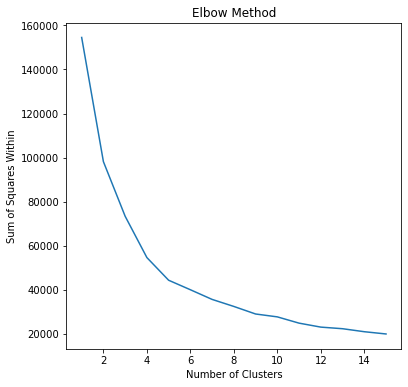

In [25]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# 군집의 수를 키워가며 Sum of Squares Within을 계산한다.
ssw = []
cluster_ns = range(1,16)
for n in cluster_ns:
    my_cluster = KMeans(n)
    my_cluster.fit(tour_float)
    ssw += [my_cluster.inertia_]         # SSW를 모아둔다.

plt.figure(figsize = (6,6))
plt.plot(cluster_ns, ssw)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Sum of Squares Within')
plt.show()

## XGBoost

In [44]:
import xgboost
from xgboost import XGBClassifier
from xgboost import plot_tree
from sklearn.model_selection import train_test_split

In [29]:
clf = xgboost.XGBClassifier(n_estimators=100, learning_rate = 0.1, max_depth=9,random_state=0)
X = tour_float.drop(columns=['label'])
y = tour_float['label']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [31]:
clf.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=9,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [32]:
print(f"훈련 정확도 : {clf.score(X_train,y_train)}")
print(f"테스트 정확도 : {clf.score(X_test,y_test)}")

훈련 정확도 : 1.0
테스트 정확도 : 0.995164960182025


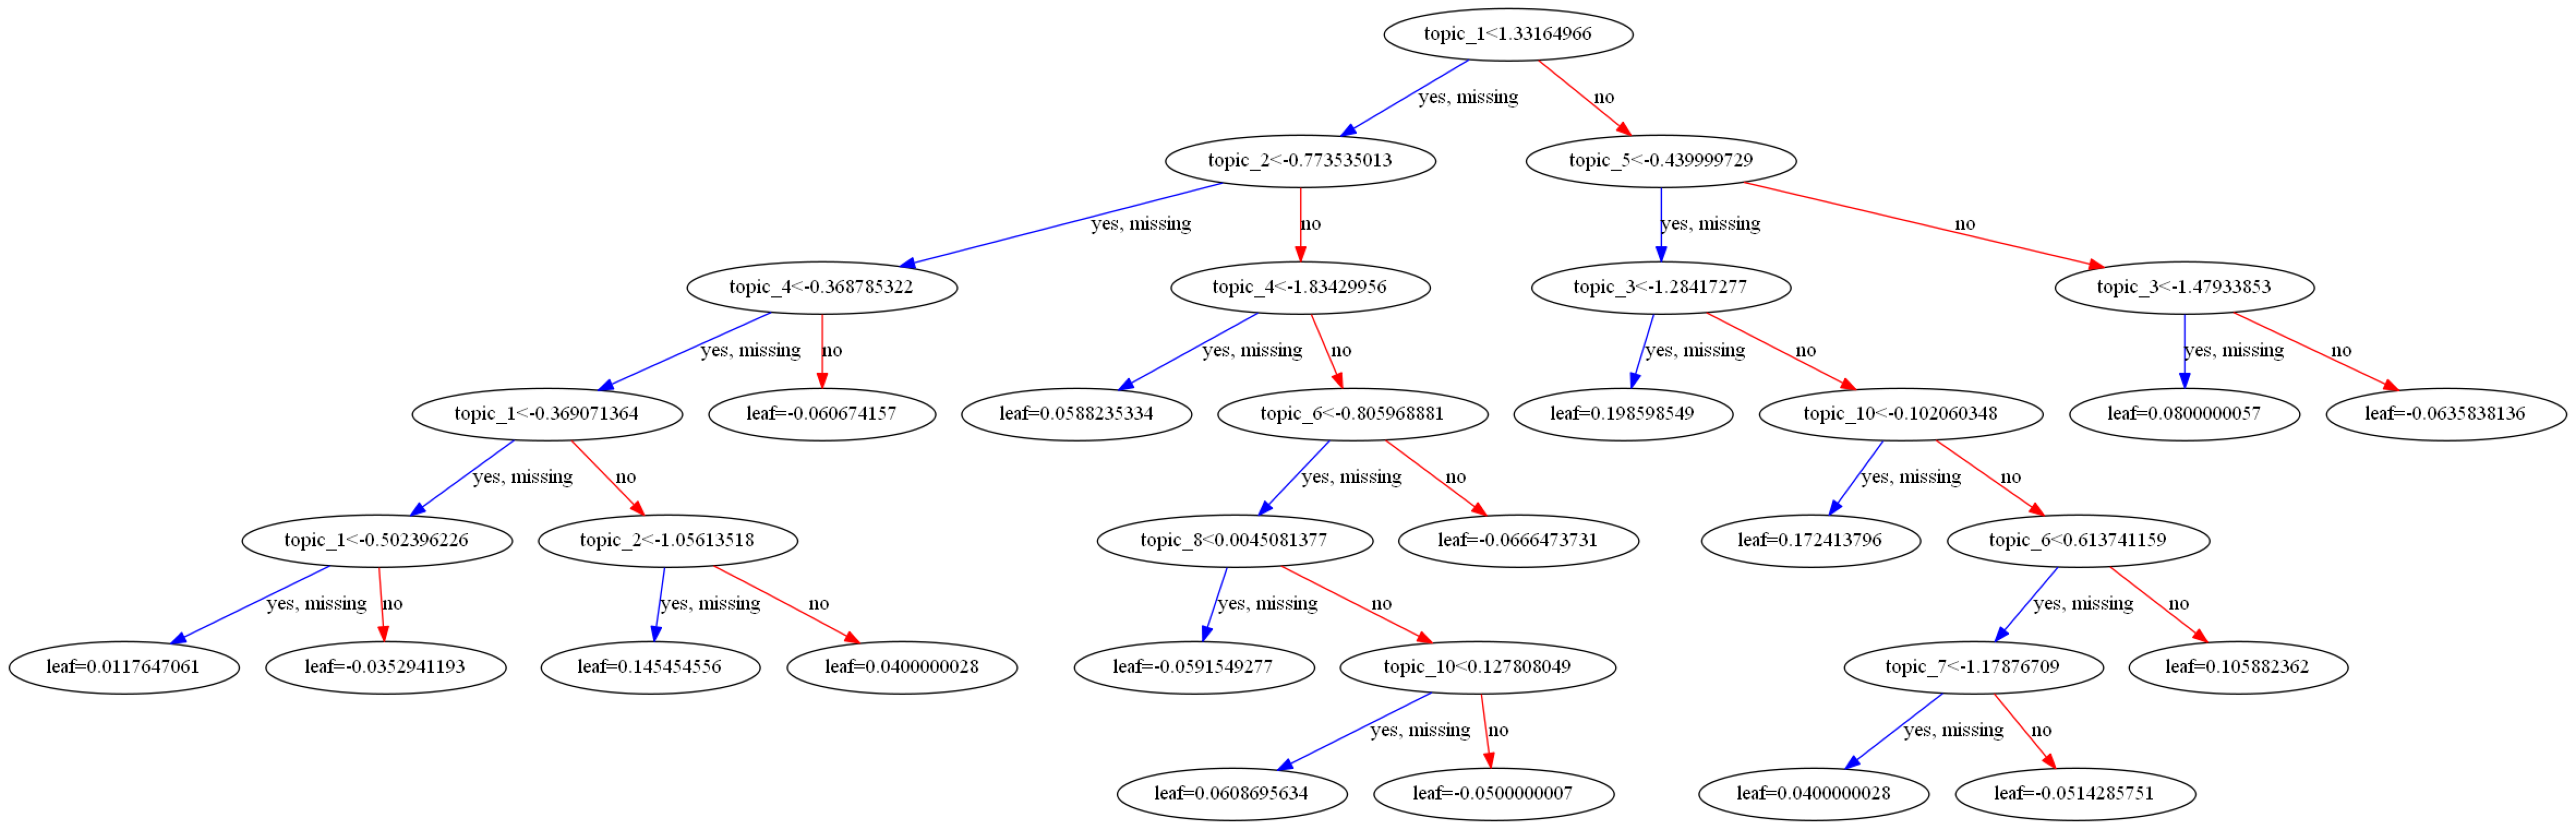

In [52]:
plot_tree(clf, num_trees=1)
fig = plt.gcf()
fig.set_size_inches(100, 60)

In [ ]:
tour = pd.concat([tour_str, tour_float], axis = 1)

In [35]:
tour.head()

,name,region,tel,keyword,photo,address,lat,lon,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,label
0,(구)강경노동조합,충남 논산시,041-746-5412,건축사 건축여행 관광지 구강경노동조합 근대건축 근대건축물 등록문화재,https://cdn.visitkorea.or.kr/img/call?cmd=VIEW...,충청남도 논산시 강경읍 옥녀봉로27번길 30-5,36.160849,127.014602,-0.378678,-0.667168,0.568392,0.430442,0.115701,-0.698888,0.409120,-0.205234,-0.149075,-0.576526,2
1,(구)인천일본제58은행지점,인천 중구,032-760-6474,관광지 교과서속여행 구인천일본제58은행지점 문화재 수도권 역사,https://cdn.visitkorea.or.kr/img/call?cmd=VIEW...,인천광역시 중구 신포로23번길 77,37.472859,126.621154,-0.378678,-0.173759,0.568392,0.430442,1.110287,0.805444,0.488515,-0.205234,-0.149075,0.753960,2
2,(구)태백등기소,강원 태백시,166,관광지,https://cdn.visitkorea.or.kr/img/call?cmd=VIEW...,강원도 태백시 하장성 1길 14,37.102615,129.020972,-0.378678,-0.667168,0.568392,0.430442,0.115701,-0.698888,0.409120,-0.205234,-0.149075,-0.576526,2
3,(구)한일은행 강경지점,충남 논산시,041-746-5412,건축물 건축사 건축여행 관광지 근대건축 근대건축물 역사 역사공부,https://cdn.visitkorea.or.kr/img/call?cmd=VIEW...,충청남도 논산시 강경읍 계백로167번길 50,36.162130,127.015154,-0.378678,-0.667168,0.568392,0.430442,1.363166,-0.698888,0.488515,-0.205234,-0.149075,-0.576526,2
4,(전)광주 성거사지 오층석탑,광주 남구,062-607-2333,관광지 광주서오층석탑 광주성거사지오층석탑 보물 역사공부 역사관광지,https://cdn.visitkorea.or.kr/img/call?cmd=VIEW...,광주광역시 남구 천변좌로338번길 7,35.147999,126.908710,-0.378678,-0.667168,0.568392,0.430442,1.363166,-0.698888,0.488515,-0.205234,-0.149075,-0.576526,2


In [36]:
tour.to_csv("./final_data/tour.csv", mode='w', encoding ='utf-8-sig')

## keyword 입력

In [37]:
keyword_input = input().split()

count = 0
tour_name = []
for i in range(tour.shape[0]):
  count = 0
  for k in keyword_input:
    if k not in tour.loc[i, 'keyword']:
      count = 1
      continue
  if count == 0:
    tour_name.append(tour.loc[i, 'name'])


서울 가족


In [38]:
X_df = tour[tour['name'] == tour_name[0]]
X_df = X_df.loc[:, 'topic_1':'topic_10']
result = clf.predict(X_df)
print(result)


[0]


In [41]:
tour[tour['label'] == result[0]].head()

,name,region,tel,keyword,photo,address,lat,lon,topic_1,topic_2,topic_3,topic_4,topic_5,topic_6,topic_7,topic_8,topic_9,topic_10,label
7,(주)우리술,경기 가평군,031-585-8525,견학 관광지 산업관광 수도권 연중무휴 우리술 이색체험 전통산업,https://cdn.visitkorea.or.kr/img/call?cmd=VIEW...,경기도 가평군 조종면 대보간선로 29,37.819769,127.356259,-0.378678,-0.667168,0.568392,0.430442,0.115701,0.805444,0.409120,-0.205234,3.021805,0.753960,0
17,25의용단,부산 수영구,051-752-2947,25의용단 경상권 관광지 교과서속여행 아이와함께 역사 역사공부,https://cdn.visitkorea.or.kr/img/call?cmd=VIEW...,부산광역시 수영구 연수로379번길 42,35.171552,129.113589,-0.378678,1.137933,0.568392,0.430442,1.363166,0.491038,0.488515,0.341693,0.359397,0.078944,0
18,3.1독립선언기념탑,서울 서대문구,1577-0606,3.1독립선언기념탑 관광지 사계절 수도권 아이와함께 역사공부 역사관광지,https://cdn.visitkorea.or.kr/img/call?cmd=VIEW...,서울특별시 서대문구 통일로 251,37.574301,126.955918,-0.378678,1.137933,0.568392,0.430442,1.363166,1.505861,0.488515,0.341693,0.359397,0.753960,0
21,365세이프타운,강원 태백시,033-550-3101,365세이프타운 가족여행 강원권 관광지 미세먼지_피하는_실내여행,https://cdn.visitkorea.or.kr/img/call?cmd=VIEW...,강원도 태백시 평화길 15,37.100492,129.024269,-0.216564,1.690490,0.568392,0.430442,0.115701,0.190953,0.409120,-0.205234,-0.149075,0.212970,0
27,40계단 문화관광테마거리,부산 중구,051-600-4041,40계단문화관광테마거리 걷기길 관광지 문화공간 아이와함께 역사공부,https://cdn.visitkorea.or.kr/img/call?cmd=VIEW...,부산광역시 중구 40계단길 일대,35.104979,129.034887,-0.095025,1.137933,0.568392,0.430442,1.363166,0.491038,0.488515,0.341693,0.359397,0.797100,0


In [ ]:
# 유사도 행렬 (4803, 4803)
# 1, 1 (1번째 영화와 1번재 영화의 유사도)
# 1, 1 / 1, 2 / .... / 1, 4803 -> 1번째 영화와 1~4803번재 영화의 유사도
# 2, 1 / 2, 2 / .... / 2, 4803 -> 2번째 영화와 1~4803번째 영화의 유사도
# ....
# 4803, 1 / 4803, 2 / .... / 4803, 4803 -> 4803번째 영화와 1~4803번째 영화의 유사도
from sklearn.metrics.pairwise import cosine_similarity

# 4803개의 영화랑 4803개의 영화끼리 유사도를 구하겠다!
# 자신과의 유사도는 1
genres_similarity = cosine_similarity(tfidf_matrix, tfidf_matrix)
print(genres_similarity)
# 유사도 값이 높은 영화의 제목
# 유사도 값이 높은 순으로 인덱스 값을 뽑아낸다
similar_index = np.argsort(-genres_similarity)
print(similar_index.shape)

In [ ]:
# 사용자가 입력한 영화의 인덱스 값을 찾아내고
# similar_index 에 기록된 유사한 영화 인덱스를 찾아내고
# 유사한 영화 인덱스를 토대로 영화 이름을 찾아내면 된다!
# input_movie = input()
for name in tour_name:
  movie_index = tour[tour['name']==name].index.values
  print(movie_index)
  similar_movies = similar_index[movie_index, :5]
  print(similar_movies)
  # 인덱스로 사용하기 위해서는 1차원으로 변형해줘야하기 때문
  similar_movies_index = similar_movies.reshape(-1)
  print(similar_movies_index)
  print(tour.iloc[similar_movies_index]['name'])

# Count (빈도수)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
count_vec = CountVectorizer(ngram_range=(1, 2))
count_matrix = count_vec.fit_transform(tour['keyword'])
print(count_matrix)

In [ ]:
# 유사도 행렬 (4803, 4803)
# 1, 1 (1번째 영화와 1번째 영화의 유사도)
# 1, 1 / 1, 2 / .... / 1, 4803
# 2, 1 / 2, 2 / .... / 2, 4803
# .....
# 4803, 1 / 4803, 2 / .... / 4803, 4803
from sklearn.metrics.pairwise import cosine_similarity

# 4803개의 영화랑 4803개의 영화끼리 유사도를 구하겠다!
genres_similarity = cosine_similarity(count_matrix, count_matrix)
print(genres_similarity)
# 유사도가 높은 영화를 알고 싶다!
# 유사도 값이 높은 것의 인덱스를 내림차순으로 출력/리턴
similar_index = np.argsort(-genres_similarity)
print(similar_index)